# Classification of MNIST digits with dense layers

## Loading the image data

In [0]:
from keras.datasets import mnist
import numpy as np

(train_images_original, train_labels_original), (test_images_original, test_labels_original) = mnist.load_data()

## Preparing the image data

In [0]:
train_images = train_images_original.reshape((60000, 28, 28))
train_images = train_images.astype('float32') / 255

test_images = test_images_original.reshape((10000, 28, 28))
test_images = test_images.astype('float32') / 255

avg_train = np.zeros((60000, 28))
avg_test = np.zeros((10000, 28))

i = 0
for image in train_images:
  avg_train[i] = np.mean(image, axis = 0) + np.mean(image, axis = 1)
  i += 1

i = 0
for image in test_images:
  avg_test[i] = np.mean(image, axis = 0) + np.mean(image, axis = 1)
  i += 1

## Preparing the labels

We need to categorically encode the labels.

In [0]:
from keras.utils import to_categorical

train_labels = to_categorical(train_labels_original)
test_labels = to_categorical(test_labels_original)

## Deplaying some of the original and prepared image data and labels

In [299]:
avg_train.shape

(60000, 28)

In [300]:
train_images_original.shape

(60000, 28, 28)

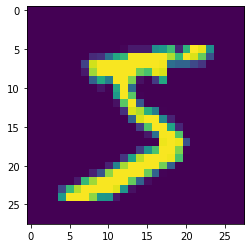

In [301]:
import matplotlib.pyplot as plt
plt.imshow(train_images_original[0])
plt.show()

In [302]:
train_labels.shape

(60000, 10)

In [303]:
train_labels[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [0]:
import numpy as np

In [305]:
np.argmax(train_labels[0])

5

In [306]:
train_labels_original[0]

5

## The network architecture

In [307]:
from keras import models
from keras import layers

network = models.Sequential()
network.add(layers.Dense(512, activation='relu', input_shape=(28, )))
network.add(layers.Dense(10, activation='softmax'))
network.summary()

Model: "sequential_19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_35 (Dense)             (None, 512)               14848     
_________________________________________________________________
dense_36 (Dense)             (None, 10)                5130      
Total params: 19,978
Trainable params: 19,978
Non-trainable params: 0
_________________________________________________________________


## The compilation step

In [0]:
network.compile(optimizer='rmsprop',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

## The training step

In [309]:
epochs = 10
history = network.fit(avg_train, 
                      train_labels, 
                      epochs=epochs, 
                      batch_size=128, 
                      validation_data=(avg_test, test_labels))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 2s 35us/step - loss: 1.3173 - acc: 0.5985 - val_loss: 1.0821 - val_acc: 0.6558
Epoch 2/10
60000/60000 [==============================] - 1s 20us/step - loss: 1.0393 - acc: 0.6645 - val_loss: 0.9685 - val_acc: 0.6851
Epoch 3/10
60000/60000 [==============================] - 1s 19us/step - loss: 0.9583 - acc: 0.6876 - val_loss: 0.9173 - val_acc: 0.6986
Epoch 4/10
60000/60000 [==============================] - 1s 18us/step - loss: 0.9039 - acc: 0.7043 - val_loss: 0.8760 - val_acc: 0.7093
Epoch 5/10
60000/60000 [==============================] - 1s 18us/step - loss: 0.8642 - acc: 0.7170 - val_loss: 0.8502 - val_acc: 0.7185
Epoch 6/10
60000/60000 [==============================] - 1s 18us/step - loss: 0.8349 - acc: 0.7261 - val_loss: 0.8289 - val_acc: 0.7243
Epoch 7/10
60000/60000 [==============================] - 1s 18us/step - loss: 0.8124 - acc: 0.7330 - val_loss: 0.7953 - val_acc

## Display the training/test loss/accuracy

In [0]:
history_dict = history.history
loss_values = history_dict['loss']
test_loss_values = history_dict['val_loss']
epochs_range = range(1, epochs + 1)

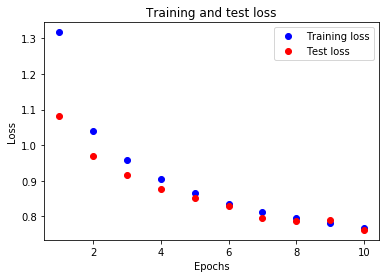

In [311]:
plt.plot(epochs_range, loss_values, 'bo', label='Training loss')
plt.plot(epochs_range, test_loss_values, 'ro', label='Test loss')
plt.title('Training and test loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [0]:
acc_values = history_dict['acc']
test_acc_values = history_dict['val_acc']

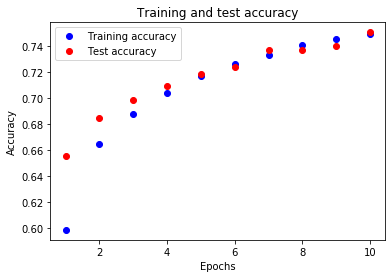

In [313]:
plt.plot(epochs_range, acc_values, 'bo', label='Training accuracy')
plt.plot(epochs_range, test_acc_values, 'ro', label='Test accuracy')
plt.title('Training and test accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()